### Example usage

- splitplot on titanic dataset

In [3]:
from data_view import *
import seaborn as sns
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

In [4]:
# import and read datasets
from sklearn import datasets

iris_load = datasets.load_iris()
iris = pd.DataFrame(iris_load.data, columns=iris_load.feature_names)
iris['species'] = iris_load.target

titanic = pd.read_csv('data/titanic.csv', error_bad_lines=False)

In [5]:
color_base = list(mcolors.BASE_COLORS)

def baseplot(s, color=None, label=None, **kwargs):
    sns.distplot(s, color=color, label=label, **kwargs)
    plt.grid(True)

def splitplot(d=None, y=None, hue=None, figsize=(8, 8), **kwargs):
    plt.figure(figsize=figsize)
    if hue != None:
        for idx, col_hue in enumerate(d[hue].unique()):
            baseplot(d[d[hue] == col_hue][y].dropna(), 
                       color=color_base[idx%len(color_base)], label=col_hue, **kwargs)
    plt.legend()
    plt.show()

### Distplot Age vs Pclass

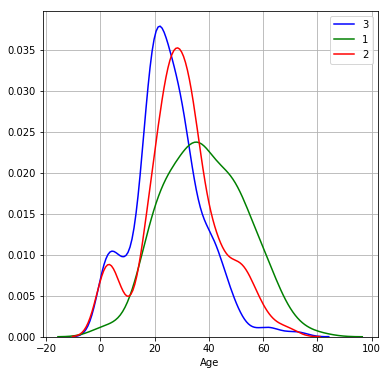

In [10]:
splitplot(titanic, y='Age', hue='Pclass', hist=False, bins=15, figsize=(6, 6))

### Distplot Age vs Survived

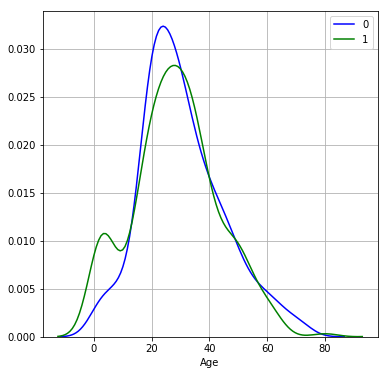

In [11]:
splitplot(titanic, y='Age', hue='Survived', hist=False, bins=20, figsize=(6, 6))

### Iris (Sepal length vs Species)

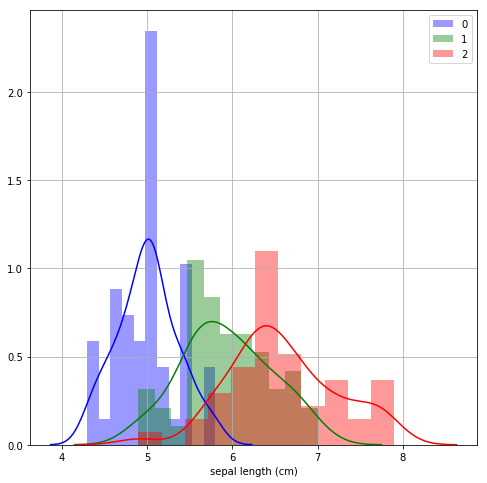

In [25]:
splitplot(iris, y='sepal length (cm)', hue='species', hist=True, bins=11, figsize=(8, 8))

### Iris (Petal length vs Species)

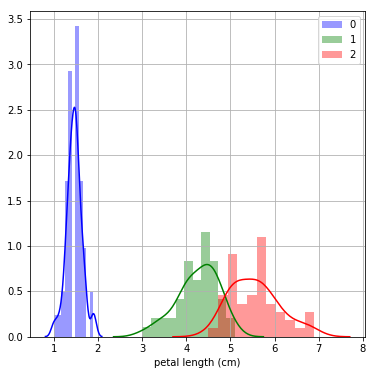

In [24]:
splitplot(iris, y='petal length (cm)', hue='species', hist=True, bins=11, figsize=(6, 6))